In [1]:
import os

import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms

In [98]:
data_dir = os.path.join('..', 'data', 'FMNIST')

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize([0.5], [0.5])])
trainset = torchvision.datasets.FashionMNIST(root=data_dir, train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=16,
                                          shuffle=True, num_workers=2)
testset = torchvision.datasets.FashionMNIST(root=data_dir, train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                          shuffle=False, num_workers=2)

[tensor(3)] [tensor(5)] [tensor(1)] [tensor(0)]


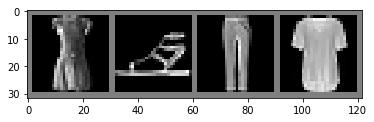

Process Process-48:
Process Process-47:
Traceback (most recent call last):
  File "/usr/local/Cellar/python3/3.6.2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
Traceback (most recent call last):
  File "/usr/local/Cellar/python3/3.6.2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/Cellar/python3/3.6.2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/usr/local/Cellar/python3/3.6.2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/Cellar/python3/3.6.2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 52, in _worker_loop
    r = index_queue.get()

In [82]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % [labels[j]] for j in range(4)))

In [99]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 8, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(8, 16, 5)
        self.fc1 = nn.Linear(16*4*4, 120)
        self.fc2 = nn.Linear(120, 36)
        self.fc30 = nn.Linear(36, 2)
        self.fc31 = nn.Linear(36, 2)
        self.fc32 = nn.Linear(36, 2)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16*4*4)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x0 = self.fc30(x)
        x1 = self.fc31(x)
        x2 = self.fc32(x)
        return (x0, x1, x2)

net = Net()

In [100]:
params = list(net.parameters())
print(len(params))
print([x.size() for x in params])

14
[torch.Size([8, 1, 5, 5]), torch.Size([8]), torch.Size([16, 8, 5, 5]), torch.Size([16]), torch.Size([120, 256]), torch.Size([120]), torch.Size([36, 120]), torch.Size([36]), torch.Size([2, 36]), torch.Size([2]), torch.Size([2, 36]), torch.Size([2]), torch.Size([2, 36]), torch.Size([2])]


In [101]:
net

Net(
  (conv1): Conv2d(1, 8, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(8, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=256, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=36, bias=True)
  (fc30): Linear(in_features=36, out_features=2, bias=True)
  (fc31): Linear(in_features=36, out_features=2, bias=True)
  (fc32): Linear(in_features=36, out_features=2, bias=True)
)

In [102]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [103]:
def onehot(labels):
    oh_label = torch.zeros(len(labels), 10, dtype=torch.int64)
    for i in range(len(labels)):
        oh_label[i,labels[i]] = 1
    return oh_label

In [104]:
data = iter(trainloader)
inputs, labels = next(data)
print(labels)
print(type(labels))
print(labels.requires_grad)
print(labels.dtype)
print(onehot(labels))
print(type(onehot(labels)))
print(onehot(labels).requires_grad)
print(onehot(labels).dtype)

tensor([ 8,  9,  9,  9,  6,  3,  3,  8,  0,  6,  1,  0,  1,  2,
         3,  1])
<class 'torch.Tensor'>
False
torch.int64
tensor([[ 0,  0,  0,  0,  0,  0,  0,  0,  1,  0],
        [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  1],
        [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  1],
        [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  1],
        [ 0,  0,  0,  0,  0,  0,  1,  0,  0,  0],
        [ 0,  0,  0,  1,  0,  0,  0,  0,  0,  0],
        [ 0,  0,  0,  1,  0,  0,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  0,  0,  0,  0,  1,  0],
        [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0],
        [ 0,  0,  0,  0,  0,  0,  1,  0,  0,  0],
        [ 0,  1,  0,  0,  0,  0,  0,  0,  0,  0],
        [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0],
        [ 0,  1,  0,  0,  0,  0,  0,  0,  0,  0],
        [ 0,  0,  1,  0,  0,  0,  0,  0,  0,  0],
        [ 0,  0,  0,  1,  0,  0,  0,  0,  0,  0],
        [ 0,  1,  0,  0,  0,  0,  0,  0,  0,  0]])
<class 'torch.Tensor'>
False
torch.int64


In [111]:
for epoch in range(5):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader):
        # get the inputs
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs[0], onehot(labels)[:,0])+\
               criterion(outputs[1], onehot(labels)[:,1])+\
               criterion(outputs[2], onehot(labels)[:,2])
        loss.backward()
        optimizer.step()
        
        # print statistics
        running_loss += loss.item()
        if i % 500 == 499:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 500))
            running_loss = 0.0

print('Finished Training')

[1,   500] loss: 0.230
[1,  1000] loss: 0.230
[1,  1500] loss: 0.231
[1,  2000] loss: 0.200
[1,  2500] loss: 0.232
[1,  3000] loss: 0.223
[1,  3500] loss: 0.218
[2,   500] loss: 0.210
[2,  1000] loss: 0.201
[2,  1500] loss: 0.213
[2,  2000] loss: 0.205
[2,  2500] loss: 0.211
[2,  3000] loss: 0.202
[2,  3500] loss: 0.196
[3,   500] loss: 0.201
[3,  1000] loss: 0.200
[3,  1500] loss: 0.189
[3,  2000] loss: 0.208
[3,  2500] loss: 0.187
[3,  3000] loss: 0.178
[3,  3500] loss: 0.194
[4,   500] loss: 0.181
[4,  1000] loss: 0.180
[4,  1500] loss: 0.185
[4,  2000] loss: 0.186
[4,  2500] loss: 0.184
[4,  3000] loss: 0.181
[4,  3500] loss: 0.188
[5,   500] loss: 0.167
[5,  1000] loss: 0.182
[5,  1500] loss: 0.178
[5,  2000] loss: 0.169
[5,  2500] loss: 0.175
[5,  3000] loss: 0.177
[5,  3500] loss: 0.181
Finished Training


GroundTruth:  tensor(9) tensor(2) tensor(1) tensor(1)


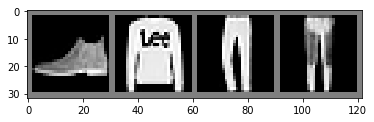

In [112]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % labels[j] for j in range(4)))

In [113]:
o0, o1, o2 = net(images)
_, p0 = torch.max(o0, 1)
_, p1 = torch.max(o1, 1)
_, p2 = torch.max(o2, 1)

print('Predicted: ', ' '.join('%5s' % p0[j] for j in range(4)))
print('Predicted: ', ' '.join('%5s' % p1[j] for j in range(4)))
print('Predicted: ', ' '.join('%5s' % p2[j] for j in range(4)))

Predicted:  tensor(0) tensor(0) tensor(0) tensor(0)
Predicted:  tensor(0) tensor(0) tensor(1) tensor(1)
Predicted:  tensor(0) tensor(1) tensor(0) tensor(0)


In [143]:
conf_mat = np.zeros([4,4], dtype=np.int32)
with torch.no_grad():
    for data in testloader:
        images, labels = data
        o0, o1, o2 = net(images)
        _, p0 = torch.max(o0, 1)
        _, p1 = torch.max(o1, 1)
        _, p2 = torch.max(o2, 1)
        for i,l in enumerate(labels):
            if l >= 3:
                l = 3
            p0i = p0[i]
            p1i = p1[i]
            p2i = p2[i]
            if p0i+p1i+p2i==1:
                cat = torch.tensor([p0i, p1i, p2i])
                _, Midx = torch.max(cat, dim=0)
                conf_mat[l,Midx] += 1
            else:
                conf_mat[l,3] += 1
print(conf_mat)

[[ 811    1   10  178]
 [   0  977    0   23]
 [  16    0  844  140]
 [ 149   20  184 6647]]


In [40]:
classes = ['0 T-shirt/top','1 Trouser','2 Pullover','3 Dress','4 Coat',
           '5 Sandal','6 Shirt','7 Sneaker','8 Bag','9 Ankle boot']

class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of 0 T-shirt/top : 84 %
Accuracy of 1 Trouser : 97 %
Accuracy of 2 Pullover : 83 %
Accuracy of 3 Dress : 88 %
Accuracy of 4 Coat : 79 %
Accuracy of 5 Sandal : 96 %
Accuracy of 6 Shirt : 73 %
Accuracy of 7 Sneaker : 93 %
Accuracy of 8 Bag : 96 %
Accuracy of 9 Ankle boot : 97 %
